# Improving accuracy of the Tesseract 4.0 output
### Goal: comparing different techniques to improve tesseract's output accuracy
- Input: images taken from net are only for demostration purpose
- output: Output using each technique

### Techniques used:
1. Concatenate same image to form one input image to algorithm (... 2 pass process)
2. Make image gray
3. Global Thresholding
4. Adaptive thresholding

### Technique not used but one can try:
1. Cropping the region of interest from the image from where we want to read the text

In [1]:
import PIL.Image as Image
import numpy as np
import pytesseract
import cv2
print('OpenCV version:',cv2.__version__)
print('pytesseract version:',pytesseract.get_tesseract_version())

OpenCV version: 4.1.0
pytesseract version: 4.0.0-beta.1


#### Example 1: Lets take this PAN card image (taken from the internet) as the input

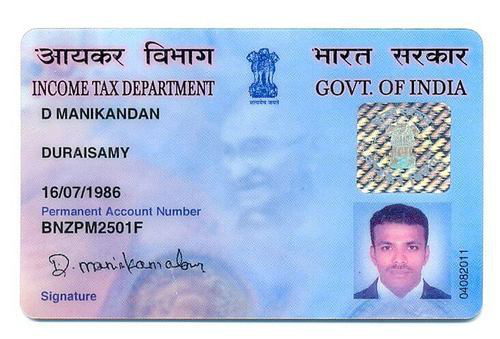

In [2]:
image = Image.open('sample pan card image 1.jpg')
image

In [3]:
print(pytesseract.image_to_string('sample pan card image 1.jpg'))

stare faant

INCOME TAX DEPARTMENT
D MANIKANDAN

DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F

Y- cory
Signatur

    
 

i

ANA Gry
GOVT. OF INDIA


## in the above output Government of india is printed at the end. Now we will Concatenate the image 6 times to see whether two pass process improves itself or not?

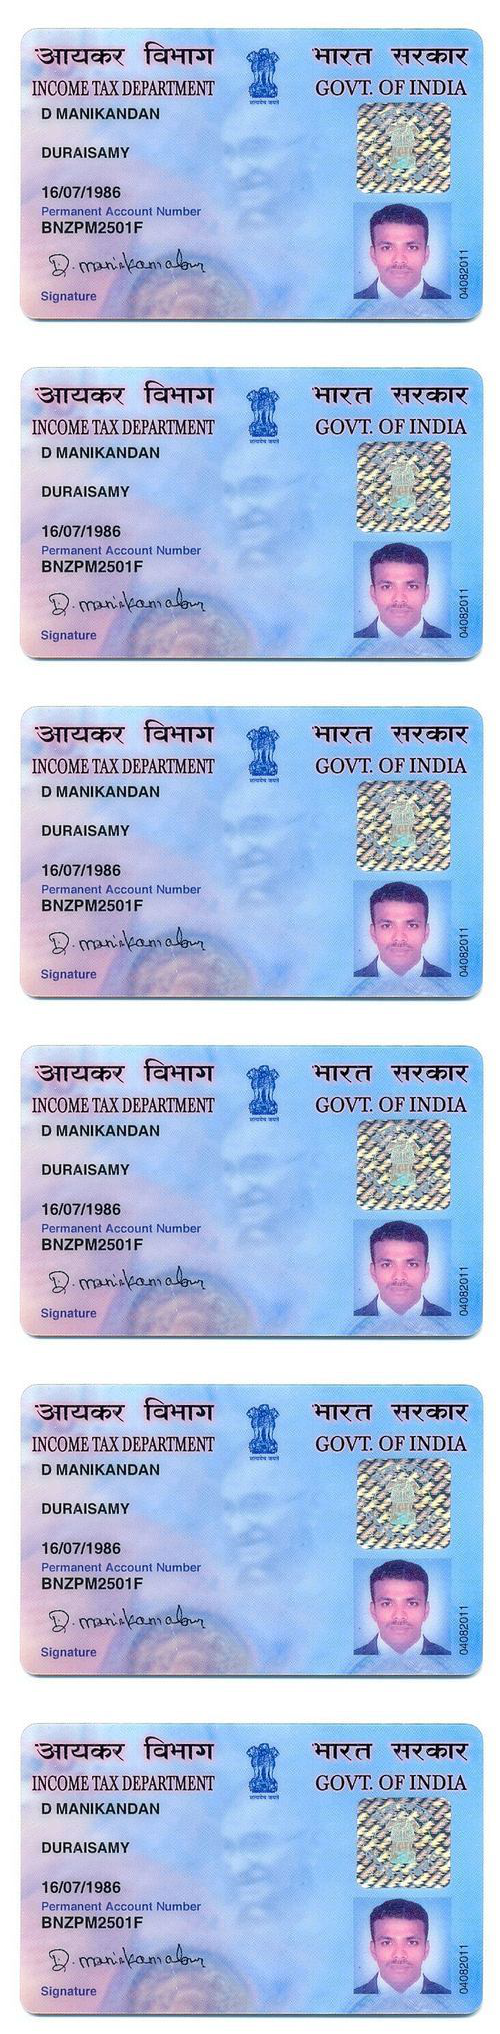

In [4]:
ConcatenatedImage = np.concatenate((image, image, image, image, image, image), axis = 0)  # axis=0 is the concatenation at bottom
ConcatenatedImage = Image.fromarray(ConcatenatedImage)
ConcatenatedImage

In [5]:
print(pytesseract.image_to_string(ConcatenatedImage))

stare faant ANd UR

INCOME TAX DEPARTMENT  x_- GOVT. OF INDIA
D MANIKANDAN Ss

  
  

DURAISAMY

16/07/1986
pene Rea
BNZPM2501F

Q- won

Signature

  

INCOME TAX DEPARTMENT
D MANIKANDAN

oo as 3

GOVT. OF INDIA
os

 

      

DURAISAMY

16/07/1986
pene Rea
BNZPM2501F

Q- won

Signature

  

INCOME TAX DEPARTMENT
D MANIKANDAN

GOVT. OF INDIA
SA

oo as 3

 
 
  

DURAISAMY

16/07/1986
pene Rea
BNZPM2501F

Q- won

Signature

  

stare faant

INCOME TAX DEPARTMENT
D MANIKANDAN

DURAISAMY
16/07/1986

pene Rea
BNZPM2501F

Q- won

Signature

    
 

 

oo as 3

INCOME TAX DEPARTMENT
D MANIKANDAN

GOVT. OF INDIA
SA

    

DURAISAMY
16/07/1986
Permanent Account Number

BNZPM2501F

Signature

 

 

stare faant ANd UR
INCOME'TAX DEPARTMENT
D MANIKANDAN

DURAISAMY

 

16/07/1986

Permanent Account Number
BNZPM2501F

Signature


### Now in the 1st output we can see the improvement the Govt. of India is along with the Income taxt Department. But Permenant Account number is not printed and also we have some garbage values. Lets try denoising the image using OpenCV

In [6]:
ConcatenatedImage = cv2.fastNlMeansDenoisingColored(np.array(ConcatenatedImage))

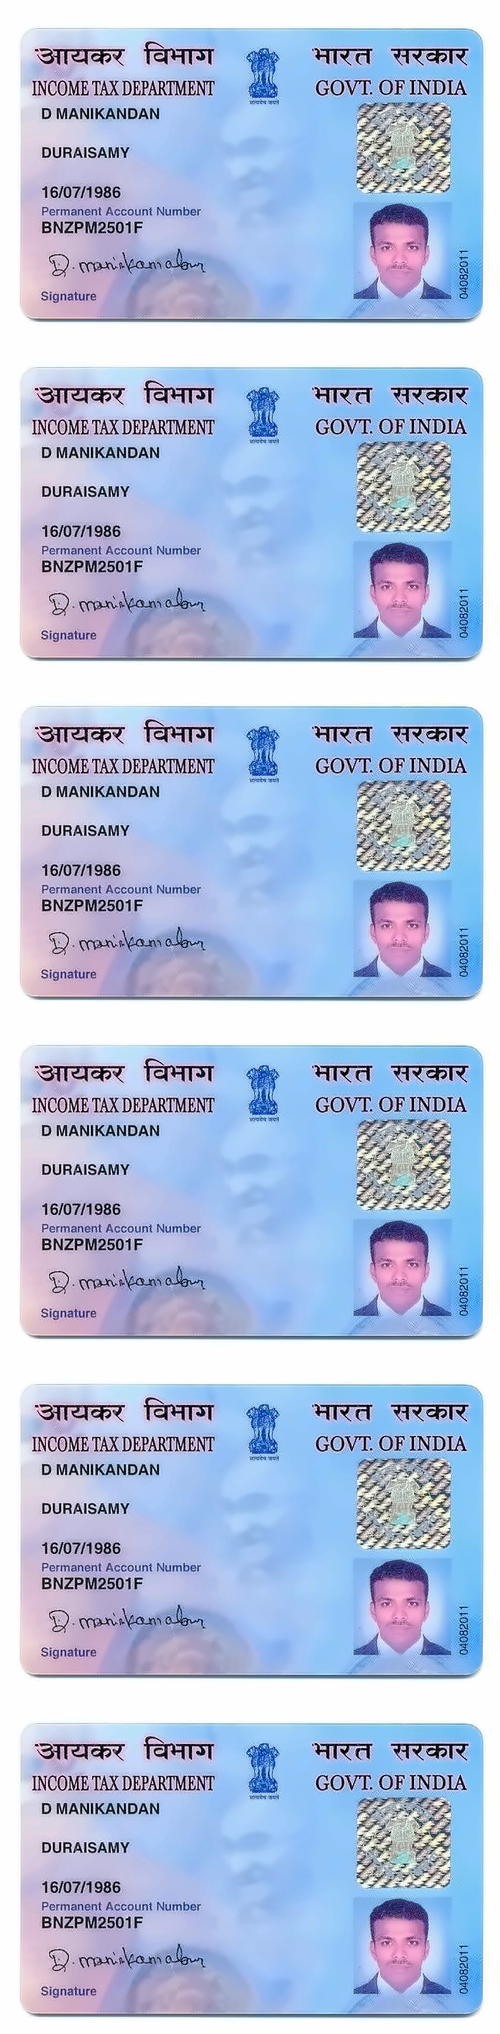

In [7]:
ConcatenatedImage = Image.fromarray(ConcatenatedImage)
ConcatenatedImage

In [8]:
print(pytesseract.image_to_string(ConcatenatedImage))

stare faant ANA UH

INCOME TAX DEPARTMENT 3 GOVT. OF INDIA
D MANIKANDAN
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature

 

stax faart FRA UCB

INCOME TAX DEPARTMENT x» GOVT. OF INDIA
D MANIKANDAN Si
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature

 

stax faart ANd Way

INCOME TAX DEPARTMENT x» GOVT. OF INDIA
D MANIKANDAN ie
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature

 

stax faart FRA UCB

INCOME TAX DEPARTMENT x» GOVT. OF INDIA
D MANIKANDAN age
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature

 

stare faant ANA UH

INCOME TAX DEPARTMENT 3 GOVT. OF INDIA
D MANIKANDAN a
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature

 

stare faant ANA UH
INCOME TAX DEPARTMENT GOVT. OF INDIA
“a Se

D MANIKANDAN

DURAISAMY

 

16/07/1986
Permanent Account Number

BNZPM2501F
Y- wrens allow

Signature


# Now o/p is improved with less garbage values. Now we will try to remove the sourrounding white border in image to the PAN card:

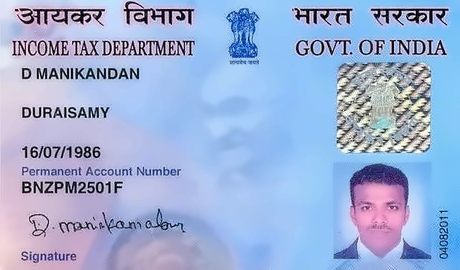

In [9]:
#Now removing the border
imageBorderRemoved = np.array(image)[40:310, 20:480]
imageBorderRemoved = cv2.fastNlMeansDenoisingColored(imageBorderRemoved)
Image.fromarray(imageBorderRemoved)

In [10]:
print(pytesseract.image_to_string(imageBorderRemoved))   #Output with less garbage than original image's o/p

sree TAMT ARa UR

INCOME TAX DEPARTMENT eo GOVT. OF INDIA
D MANIKANDAN
DURAISAMY

16/07/1986
Permanent Account Number

BNZPM2501F

D-cranvosrellorn

Signature


### Both concatenation and Denoising giving good results than the original image.

##### Now making image gray:

stare faant aNd Ua
INCOME TAX DEPARTMENT a GOVT. OF INDIA

   

D MANIKANDAN aS
Be A

DURAISAMY ee

16/07/1986 =

Permanent Account Number

BNZPM2501F

 

Signature


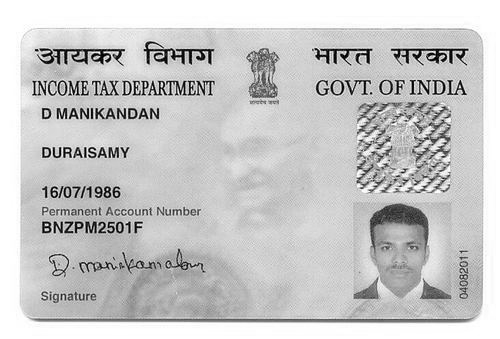

In [12]:
image = Image.open('sample pan card image 1.jpg')
gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(gray))
Image.fromarray(gray)     # we can see GOVT. OF INDIA but also some garbage values along with it

### Trying to apply global thresholding to the values of each pixel in an image: this will seperate background from text more clearly
- What is global thresholding?: In simple thresholding, the threshold value is global, i.e., it is same for all the pixels in the image. 

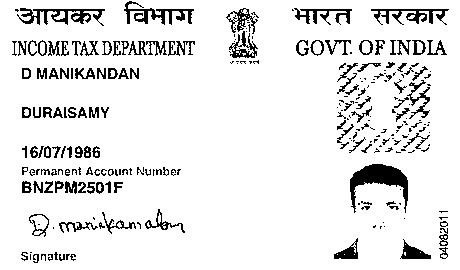

In [13]:
gray = cv2.cvtColor(imageBorderRemoved, cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold( gray,127,255,cv2.THRESH_BINARY)  #  global thresholding
Image.fromarray(th1)

In [14]:
print(pytesseract.image_to_string(th1)) # Government of India is missing. But Garbge value is removed except(above signature)

INCOME TAX DEPARTMENT
D MANIKANDAN

DURAISAMY
16/07/1986

Permanent Account Number

BNZPM2501F

Bema obey

Signature


### Now trying Adaptive thresholding:
Adaptive thresholding is the method where the threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions.


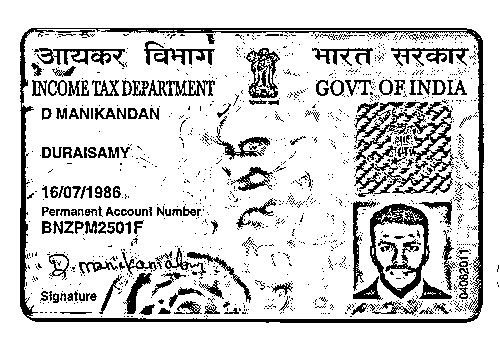

In [15]:
DenoisedImage = cv2.fastNlMeansDenoisingColored(np.array(image))
grayDenoisedImage = cv2.cvtColor(DenoisedImage, cv2.COLOR_BGR2GRAY)
th2 = cv2.adaptiveThreshold(grayDenoisedImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
Image.fromarray(th2)

In [16]:
print(pytesseract.image_to_string(th2))  # not at all useful in this case

Permanent Account Number:

BNZPM2501F


# Example 2: Image 2 

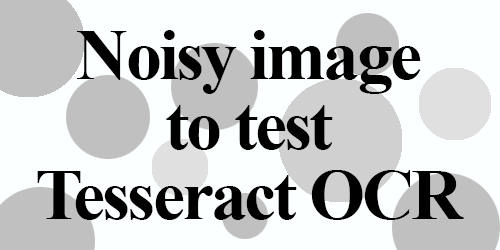

In [17]:
image = Image.open('NoisyImage.png')
image

In [18]:
print(pytesseract.image_to_string(image))

Noisyimage
to test
Tesseract OCR


### Now trying to improve acuracy by concatenating

In [19]:
image = np.array(image)

In [20]:
ConcatenatedImage = np.concatenate((image, image, image, image, image, image), axis = 0)  # axis=0 is the concatenation at bottom

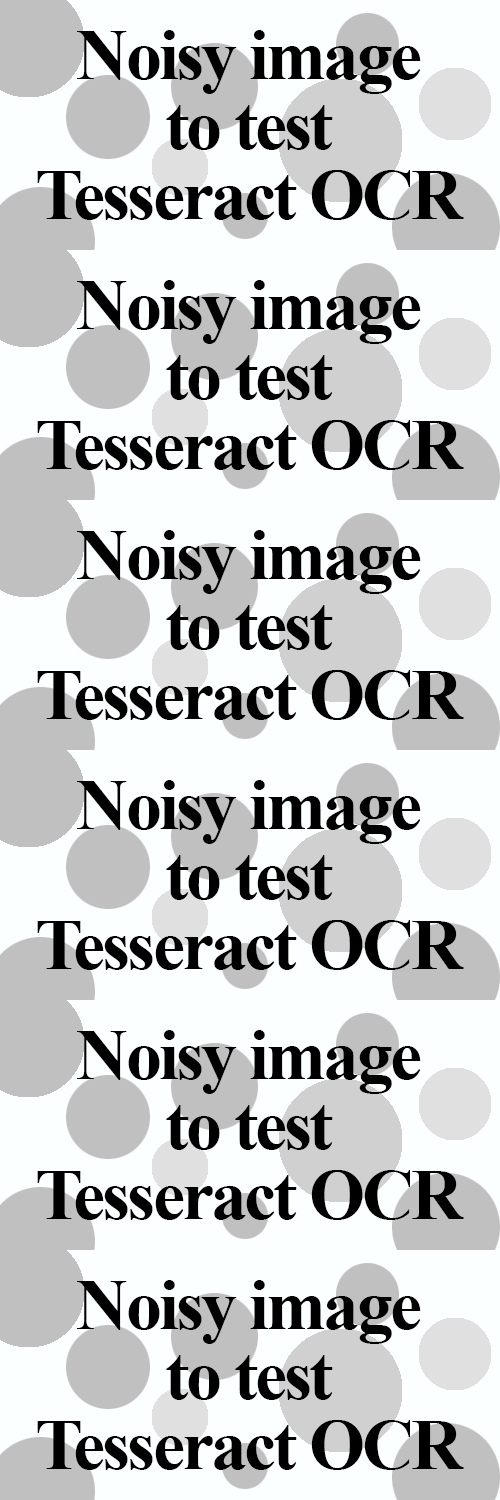

In [21]:
ConcatenatedImage = Image.fromarray(ConcatenatedImage)  # From numpy array back to PIL.Image
ConcatenatedImage

In [22]:
print(pytesseract.image_to_string(ConcatenatedImage))

Noisyimage
to test
Tesseract OCR

Noisyimage
to test
Tesseract OCR

Noisyimage
to test
Tesseract OCR

Noisyimage
to test
Tesseract OCR

Noisyimage
to test
Tesseract OCR

Noisyimage
to test
Tesseract OCR


In [23]:
# No improvement. Not recognising the space in Noisy image. Lets try to denoise the image

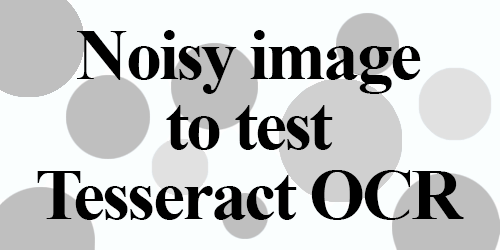

In [24]:
DenoisedImage = cv2.fastNlMeansDenoisingColored(image)
Image.fromarray(DenoisedImage)

In [25]:
print(pytesseract.image_to_string(DenoisedImage))

Noisyimage
to test
Tesseract OCR


# Global threesholding:

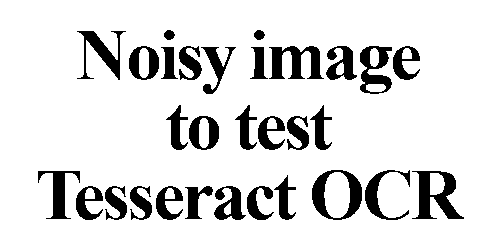

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold( gray,127,255,cv2.THRESH_BINARY)  #  global thresholding
Image.fromarray(th1)

In [27]:
print(pytesseract.image_to_string(th1)) # Global threesholding given most accurate output

Noisy image
to test
Tesseract OCR


#### trying adaptive thresholding

In [28]:
grayDenoisedImage = cv2.cvtColor(DenoisedImage, cv2.COLOR_BGR2GRAY)
th2 = cv2.adaptiveThreshold(grayDenoisedImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
print(pytesseract.image_to_string(th2)) # Now we got success here.

Noisyimige
to tet \ O
“Tesseract OGR)


# Conclusion: 
- The accuracy improvement may or may not work using concatenation, denoising methods only. 
- Global threesholding is good technique to use. Since its giving most accurate output in both the input images 
- Adaptive threesholding technique did not worked in both the images
- It depends on the image and what kind of preprocessing that image requires. 
- Identification of what preprocessing technique we have to use can not be automated till we have some satndard image as reference for comparision. 
- Hence we have to check manually to think which technique will help to get more accurate results.

## Note: 
- Another method that one can try is: crop only that region which we are interested in in an image to read the text from. This will remove all the uneccessary information as the input to Tesseract. It will also reduce the garbage values in the output.